# LOAN PROJECT

LOAD WANTED LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
import warnings
warnings.filterwarnings('ignore')

# CHECKING DATA ROWS AND COLUMNS

In [2]:
df=pd.read_csv("loan.csv")

In [3]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [4]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [5]:
df.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


In [6]:
df.shape

(614, 13)

data has 614 rows and 13 columns

In [7]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

there are 13 different columns are there they are Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'

In [8]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

most of the datas are in object types and others are floats, only one data in int format

In [9]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

null presence is there

<AxesSubplot:>

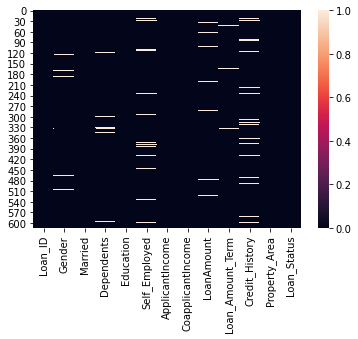

In [10]:
sns.heatmap(df.isnull())

plot clearly shows the null presence in different columns

we want to treat null variables

# EDA

# ANALYSING TARGET VARIABLE

In [11]:
df['Loan_Status']

0      Y
1      N
2      Y
3      Y
4      Y
      ..
609    Y
610    Y
611    Y
612    Y
613    N
Name: Loan_Status, Length: 614, dtype: object

Y    422
N    192
Name: Loan_Status, dtype: int64


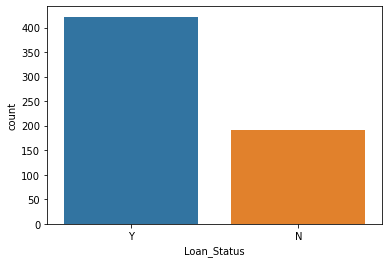

In [12]:
sns.countplot(df['Loan_Status'])
print(df["Loan_Status"].value_counts())

yes have 422 counts and no have 192 counts ,so the classes are unbalanced we will balance it later

PIE PLOT

In [13]:
Loan_count = df.groupby('Loan_Status')['Loan_Status'].count()

([<matplotlib.patches.Wedge at 0x7f8ae895f280>,
 [Text(0.6105421751933434, 0.9150072416708956, '0'),
  Text(-0.6105422608625019, -0.9150071845078075, '1')])

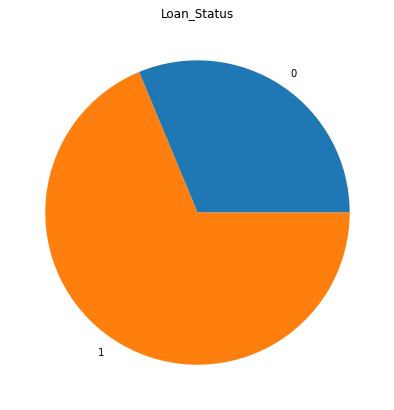

In [14]:
plt.figure(figsize=(7,7))
plt.title("Loan_Status")
plt.pie(Loan_count.values, labels=[0, 1])

IT CLEARLY SHOWS THE PARTICIAN OF YES AND Y.THIS INBALANCE DATA SHOULD BALACE FURTHER

# FEATURE COLUMNS:UNIVARIATE ANALYSIS

COUNT PLOTS

Male      489
Female    112
Name: Gender, dtype: int64


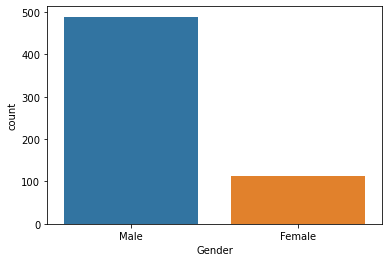

In [15]:
sns.countplot(df['Gender'])
print(df["Gender"].value_counts())

MALES ARE MORE APPLYING FOR LOAN COMPARING FEMALES,HERE THE COUNT IS Male = 489,,,,Female =112

Yes    398
No     213
Name: Married, dtype: int64


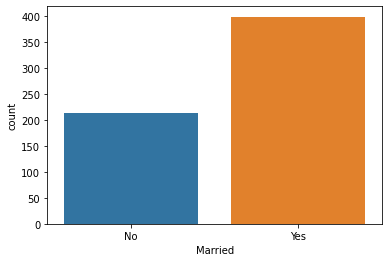

In [16]:
sns.countplot(df['Married'])
print(df["Married"].value_counts())

MARRIED PEOPLE ARE OPTING LOAN MORE COMPRING UNMARRIED PERSONS

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64


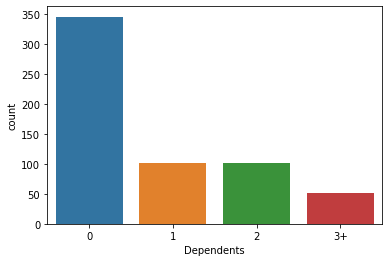

In [17]:
sns.countplot(df['Dependents'])
print(df["Dependents"].value_counts())

NO DEPENDENTS IS HUGE IN NUMBER COMPARING DEPENDENTS HAVING,,DEPENDENTS COUNT,0=345,,1=102,2=101,3+=51

Graduate        480
Not Graduate    134
Name: Education, dtype: int64


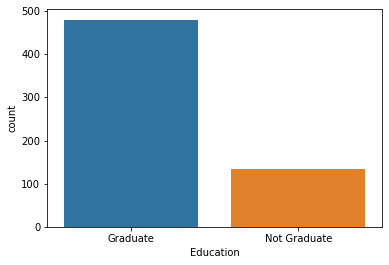

In [18]:
sns.countplot(df['Education'])
print(df["Education"].value_counts())

GRADUTES ARE MORE APPLYING LOAN COMPARING NON GRADUATES

No     500
Yes     82
Name: Self_Employed, dtype: int64


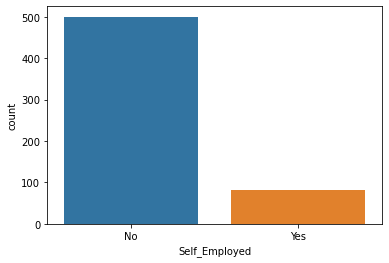

In [19]:
sns.countplot(df['Self_Employed'])
print(df["Self_Employed"].value_counts())

SELF EMPLOYED PERSONS ARE LESS IN RATIO OF APPLYING LOAN,, OTHERS ARE APPLYING MORE FOR LOAN

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64


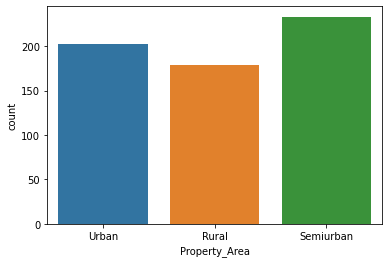

In [20]:
sns.countplot(df['Property_Area'])
print(df["Property_Area"].value_counts())

SEMI URBAN PEOPLE APPLYING MORE LOAN

# DISTRIBUTION PLOT

<AxesSubplot:xlabel='ApplicantIncome', ylabel='Density'>

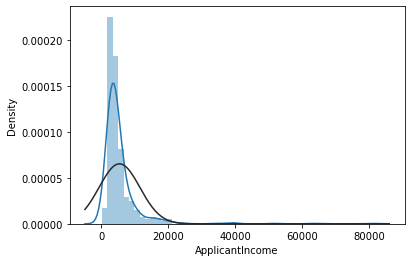

In [21]:
sns.distplot(df['ApplicantIncome'],fit=norm)

ApplicantIncome HAS SOME SKEWNESS PRESENCE

<AxesSubplot:xlabel='CoapplicantIncome', ylabel='Density'>

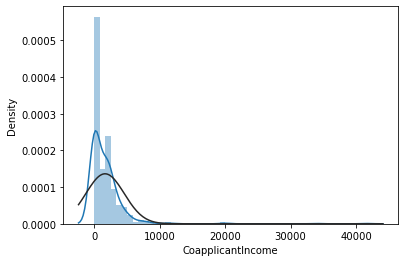

In [22]:
sns.distplot(df['CoapplicantIncome'],fit=norm)

CoapplicantIncome ALSO HAS CLEAR SKEWNESS PRESENCE

<AxesSubplot:xlabel='LoanAmount', ylabel='Density'>

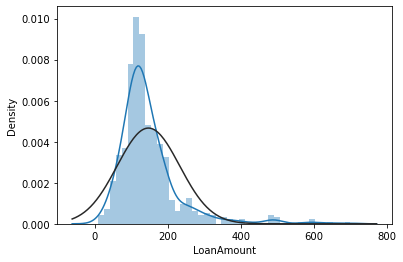

In [23]:
sns.distplot(df['LoanAmount'],fit=norm)

IT IS ALMOST NORMALLY DISTRIBUTED,LoanAmount HAS SOME PEAK VALUE

<AxesSubplot:xlabel='Loan_Amount_Term', ylabel='Density'>

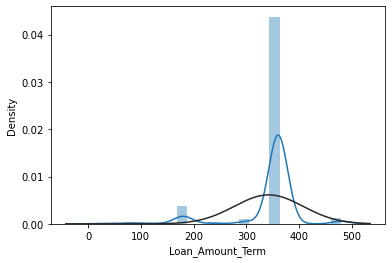

In [24]:
sns.distplot(df['Loan_Amount_Term'],fit=norm)

POSITIVE SKEWNESS IS THERE IN Loan_Amount_Term

<AxesSubplot:xlabel='Credit_History', ylabel='Density'>

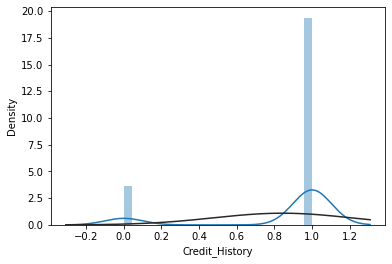

In [25]:
sns.distplot(df['Credit_History'],fit=norm)

Credit_History ALSO HAVE SKEWNESS PRESENCE

# bivariate analysis

<AxesSubplot:title={'center':'comparison of APPLICANTincome AND loan amount'}, xlabel='ApplicantIncome', ylabel='LoanAmount'>

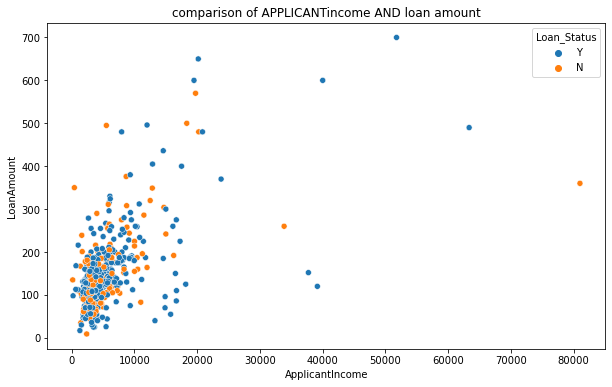

In [26]:
plt.figure(figsize=[10,6])
plt.title('comparison of APPLICANTincome AND loan amount')
sns.scatterplot(df['ApplicantIncome'],df['LoanAmount'],hue=df['Loan_Status'])

APPLICANT INCOME IS NOT THE FINAL CRITERIAN TO GET LOAN, IN HIGH INCOME STATE ALSO THERE IS A REJECTION OF LOAN STATUS

<AxesSubplot:title={'center':'comparison of loan amount AND loan stataus'}, xlabel='LoanAmount', ylabel='Loan_Status'>

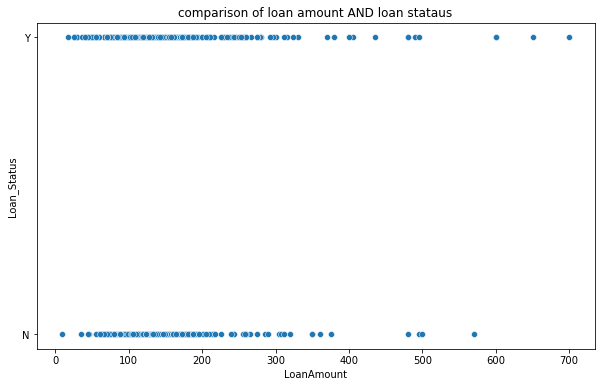

In [27]:
plt.figure(figsize=[10,6])
plt.title('comparison of loan amount AND loan stataus')
sns.scatterplot(df['LoanAmount'],df['Loan_Status'])

loan status has yes and no values in both lower loan amount and higher amount

<AxesSubplot:title={'center':'comparison of married AND loan amount'}, xlabel='Married', ylabel='LoanAmount'>

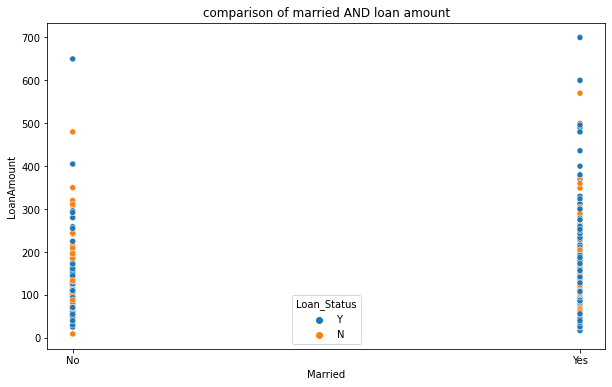

In [28]:
plt.figure(figsize=[10,6])
plt.title('comparison of married AND loan amount')
sns.scatterplot(df['Married'],df['LoanAmount'],hue=df['Loan_Status'])

married people are prefering high loan amount comparing unmarried and married people getting loan than unmarried

<AxesSubplot:title={'center':'comparison of Dependents AND loan amount'}, xlabel='Dependents', ylabel='LoanAmount'>

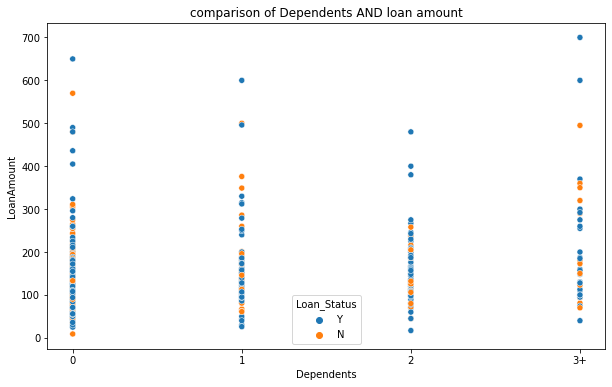

In [29]:
plt.figure(figsize=[10,6])
plt.title('comparison of Dependents AND loan amount')
sns.scatterplot(df['Dependents'],df['LoanAmount'],hue=df['Loan_Status'])

nil dependence persons are applying more loan ,butnil dependence persons  and 3plus dependence persons are applying for high amount

<AxesSubplot:title={'center':'comparison of Property_Area AND loan status'}, xlabel='Property_Area', ylabel='Loan_Status'>

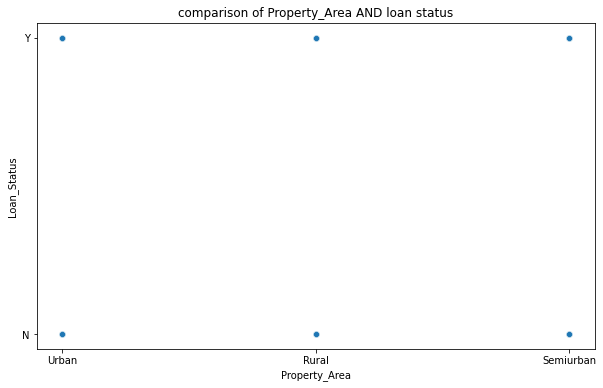

In [30]:
plt.figure(figsize=[10,6])
plt.title('comparison of Property_Area AND loan status')
sns.scatterplot(df['Property_Area'],df['Loan_Status'])

independent to all property area loan aree getting agreement and disagreement

<AxesSubplot:title={'center':'comparison of credit history AND loan amount'}, xlabel='Credit_History', ylabel='LoanAmount'>

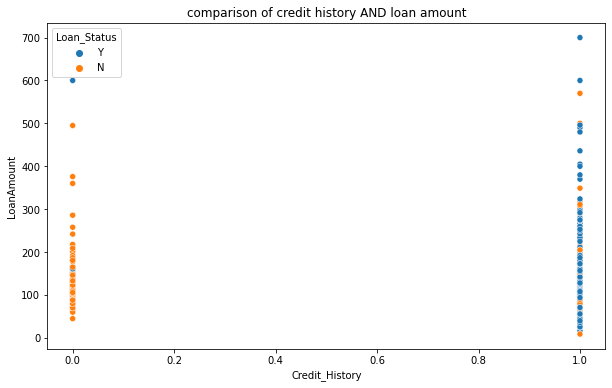

In [31]:
plt.figure(figsize=[10,6])
plt.title('comparison of credit history AND loan amount')
sns.scatterplot(df['Credit_History'],df['LoanAmount'],hue=df['Loan_Status'])

credit history is highly related to the loan amount and status,, if credit history is low,it is difficult to get loan, 

<AxesSubplot:title={'center':'comparison of self employed AND loan amount'}, xlabel='Self_Employed', ylabel='LoanAmount'>

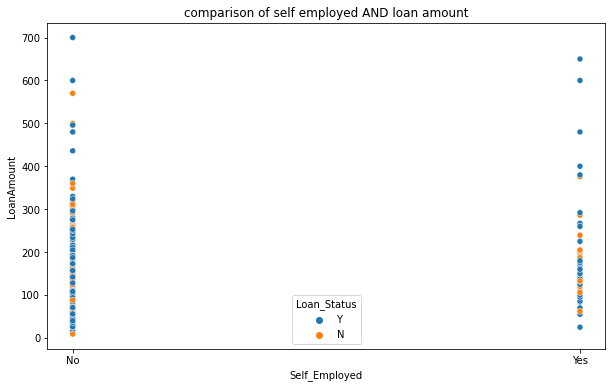

In [32]:
plt.figure(figsize=[10,6])
plt.title('comparison of self employed AND loan amount')
sns.scatterplot(df['Self_Employed'],df['LoanAmount'],hue=df['Loan_Status'])

more loan agreement is getting agreement if the person is not self employed, more loan application also did by othertan self employed persons

<AxesSubplot:title={'center':'comparison of Gender AND Credit_History'}, xlabel='Gender', ylabel='Credit_History'>

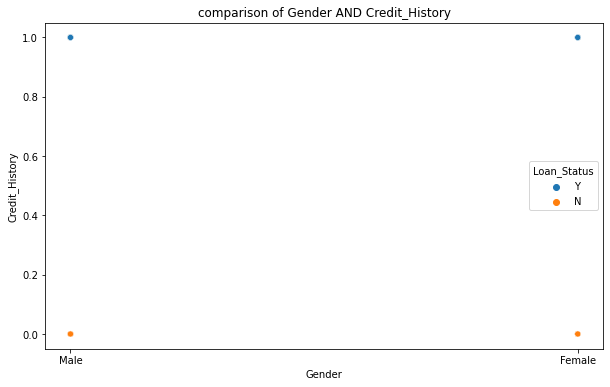

In [33]:
plt.figure(figsize=[10,6])
plt.title('comparison of Gender AND Credit_History')
sns.scatterplot(df['Gender'],df['Credit_History'],hue=df['Loan_Status'])

if credit history is low then independent to gender no one will get loan,, if credit history is high then easy to get loan

<AxesSubplot:title={'center':'comparison of education AND LoanAmount'}, xlabel='Education', ylabel='LoanAmount'>

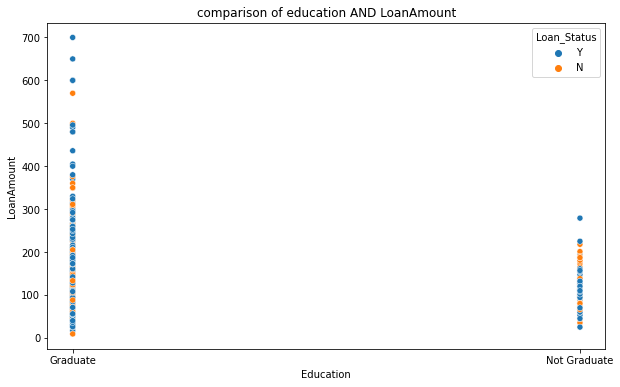

In [34]:
plt.figure(figsize=[10,6])
plt.title('comparison of education AND LoanAmount')
sns.scatterplot(df['Education'],df['LoanAmount'],hue=df['Loan_Status'])

graduate persons are more applying loan and big amount,, however both graduate and undraduate persons getting rejection nd acceptence independent to education level

# multivariate analysis

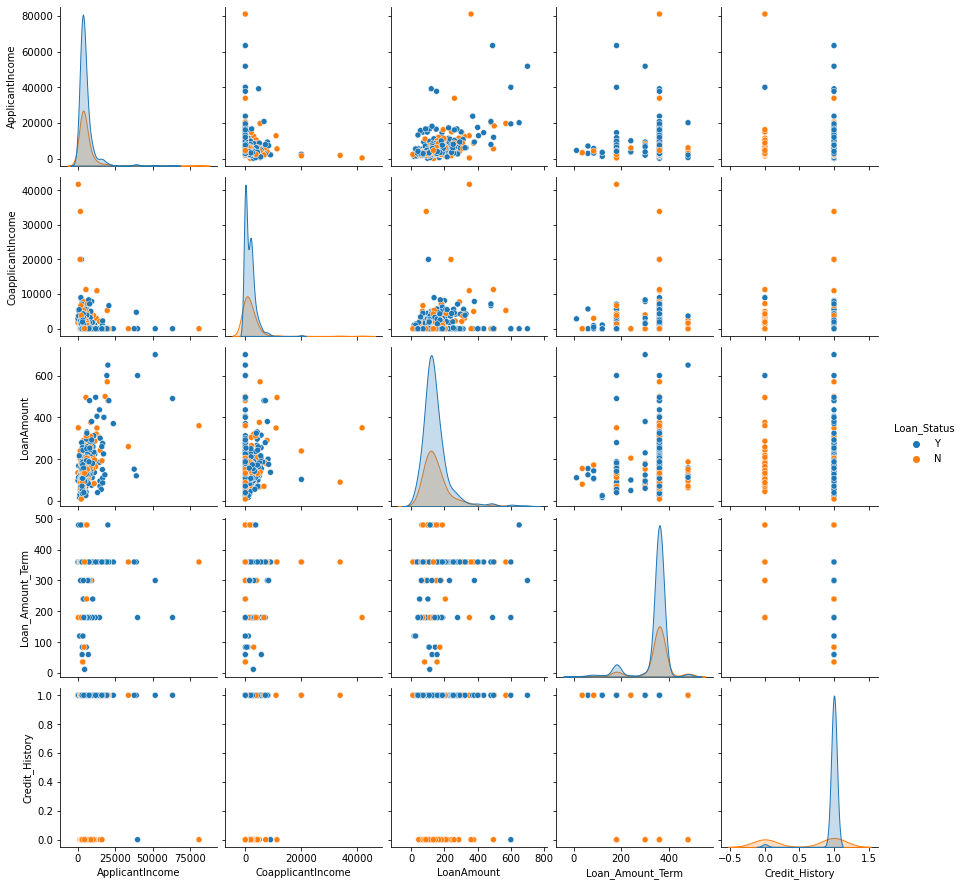

In [35]:
sns.pairplot(df,hue="Loan_Status")

\\\pairplot clearly showing the relation among the columns, by analysing it we can identify the linear dependence and independence relations

# PLOTTING BOX PLOT FOR CHECKING OUTLIERS

<AxesSubplot:xlabel='ApplicantIncome'>

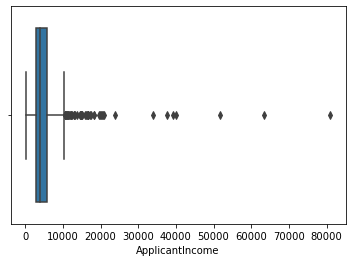

In [36]:
sns.boxplot(df['ApplicantIncome'])

ApplicantIncome has outlier presence

<AxesSubplot:xlabel='CoapplicantIncome'>

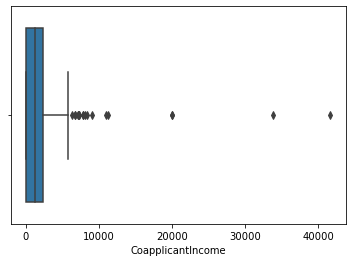

In [37]:
sns.boxplot(df['CoapplicantIncome'])

CoapplicantIncome has outlier presence

<AxesSubplot:xlabel='LoanAmount'>

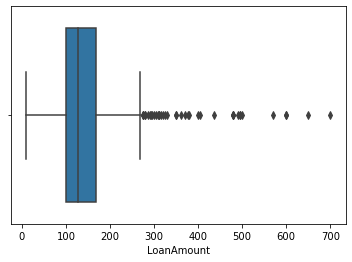

In [38]:
sns.boxplot(df['LoanAmount'])

LoanAmount also has outlier presence

<AxesSubplot:xlabel='Credit_History'>

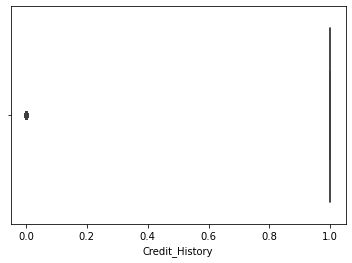

In [39]:
sns.boxplot(df['Credit_History'])

credit history has oulier presence

# DATA PREPROCESSING

# Handling null values in the data set

<AxesSubplot:>

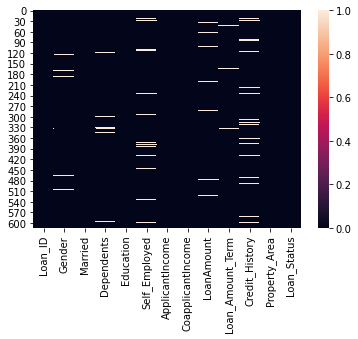

In [40]:
sns.heatmap(df.isnull())

In [41]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [42]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

for treating null values categorical data handle by mode and contineous data handle by mean

In [43]:
df['Gender'].mode()

0    Male
dtype: object

In [44]:
df['Gender']=df['Gender'].fillna(df['Gender'].mode()[0])

In [45]:
df['Married'].mode()

0    Yes
dtype: object

In [46]:
df['Married']=df['Married'].fillna(df['Married'].mode()[0])

In [47]:
df['Dependents'].mode()

0    0
dtype: object

In [48]:
df['Dependents']=df['Dependents'].fillna(df['Dependents'].mode()[0])

In [49]:
df['Self_Employed'].mode()

0    No
dtype: object

In [50]:
df['Self_Employed']=df['Self_Employed'].fillna(df['Self_Employed'].mode()[0])

In [51]:
df['LoanAmount']=df['LoanAmount'].fillna(df['LoanAmount'].mean())

In [52]:
df['Loan_Amount_Term'].mode()

0    360.0
dtype: float64

In [53]:
df['Loan_Amount_Term']=df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0])

In [54]:
df['Credit_History'].mode()

0    1.0
dtype: float64

In [55]:
df['Credit_History']=df['Credit_History'].fillna(df['Credit_History'].mode()[0])

In [56]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

<AxesSubplot:>

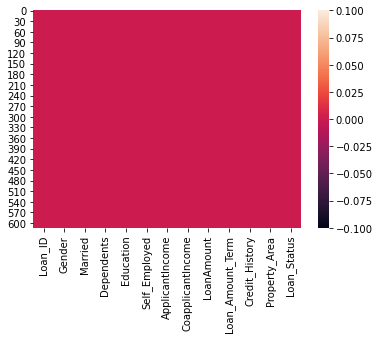

In [57]:
sns.heatmap(df.isnull())

null presence removed successfully

# ENCODING

In [58]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

OBJECT DTYPES ARE THERE IN DATASET

In [59]:
from sklearn.preprocessing import OrdinalEncoder
enc=OrdinalEncoder()

In [60]:
for i in df.columns:
    if df[i].dtypes=="object":
        df[i]=enc.fit_transform(df[i].values.reshape(-1,1))

In [61]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0.0,1.0,0.0,0.0,0.0,0.0,5849,0.0,146.412162,360.0,1.0,2.0,1.0
1,1.0,1.0,1.0,1.0,0.0,0.0,4583,1508.0,128.000000,360.0,1.0,0.0,0.0
2,2.0,1.0,1.0,0.0,0.0,1.0,3000,0.0,66.000000,360.0,1.0,2.0,1.0
3,3.0,1.0,1.0,0.0,1.0,0.0,2583,2358.0,120.000000,360.0,1.0,2.0,1.0
4,4.0,1.0,0.0,0.0,0.0,0.0,6000,0.0,141.000000,360.0,1.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,609.0,0.0,0.0,0.0,0.0,0.0,2900,0.0,71.000000,360.0,1.0,0.0,1.0
610,610.0,1.0,1.0,3.0,0.0,0.0,4106,0.0,40.000000,180.0,1.0,0.0,1.0
611,611.0,1.0,1.0,1.0,0.0,0.0,8072,240.0,253.000000,360.0,1.0,2.0,1.0
612,612.0,1.0,1.0,2.0,0.0,0.0,7583,0.0,187.000000,360.0,1.0,2.0,1.0


In [62]:
df.dtypes

Loan_ID              float64
Gender               float64
Married              float64
Dependents           float64
Education            float64
Self_Employed        float64
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area        float64
Loan_Status          float64
dtype: object

object datatypes are replaced as float successfully

# TREATING OUTLIERS

FROM BOXPLOT ANALYSIS IT IS CLEAR THAT SOME COLUMNS HAVE OUTLIER PRESENCE

In [63]:
df.shape

(614, 13)

In [64]:
from scipy.stats import zscore

In [65]:
z=np.abs(zscore(df))

In [66]:
new_df=df[(z<3).all(axis=1)]

In [67]:
new_df.shape

(577, 13)

THE LOSS IS VERY LESS SO WE CAN FURTHER PROCEED

# CORRELATION AND HEATMAP

In [68]:
df.describe()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,306.500000,0.817590,0.653094,0.744300,0.218241,0.133550,5403.459283,1621.245798,146.412162,342.410423,0.855049,1.037459,0.687296
std,177.390811,0.386497,0.476373,1.009623,0.413389,0.340446,6109.041673,2926.248369,84.037468,64.428629,0.352339,0.787482,0.463973
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,150.000000,0.000000,9.000000,12.000000,0.000000,0.000000,0.000000
25%,153.250000,1.000000,0.000000,0.000000,0.000000,0.000000,2877.500000,0.000000,100.250000,360.000000,1.000000,0.000000,0.000000
50%,306.500000,1.000000,1.000000,0.000000,0.000000,0.000000,3812.500000,1188.500000,129.000000,360.000000,1.000000,1.000000,1.000000
75%,459.750000,1.000000,1.000000,1.000000,0.000000,0.000000,5795.000000,2297.250000,164.750000,360.000000,1.000000,2.000000,1.000000
max,613.000000,1.000000,1.000000,3.000000,1.000000,1.000000,81000.000000,41667.000000,700.000000,480.000000,1.000000,2.000000,1.000000


SOME COLUMNS LIKE ApplicantIncome,CoapplicantIncome HAS HIGH STD DEVIATION, SO IT IS NOT NORMALLY DISTRIBUTED.
MOREOVER COLUMNS LIKE LOAN AMOUNT ,COAPPLICANT INCOME HAS MEAN>MEDIAN SO SKEWNESS IS DEFENITELY THERE

In [69]:
cor=new_df.corr()

In [70]:
cor

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Loan_ID,1.000000,-0.011305,-0.013380,0.059794,0.053931,0.038304,0.037729,-0.059912,0.006092,-0.023534,-0.042975,-0.164096,0.023530
Gender,-0.011305,1.000000,0.378997,0.188162,0.045696,-0.006207,0.026943,0.190543,0.159957,-0.104983,0.013172,-0.026340,0.017408
Married,-0.013380,0.378997,1.000000,0.329900,0.024817,-0.015779,-0.008567,0.237322,0.165147,-0.127348,0.019308,0.010595,0.089026
Dependents,0.059794,0.188162,0.329900,1.000000,0.069814,0.044543,0.077227,-0.026220,0.135610,-0.087389,-0.020288,0.002327,0.017872
Education,0.053931,0.045696,0.024817,0.069814,1.000000,-0.007139,-0.166400,-0.037780,-0.146598,-0.090523,-0.075217,-0.068596,-0.092658
Self_Employed,0.038304,-0.006207,-0.015779,0.044543,-0.007139,1.000000,0.250665,-0.039572,0.121892,-0.032914,-0.016390,-0.028253,-0.026525
ApplicantIncome,0.037729,0.026943,-0.008567,0.077227,-0.166400,0.250665,1.000000,-0.220975,0.442394,-0.052101,0.036664,-0.003641,-0.005003
CoapplicantIncome,-0.059912,0.190543,0.237322,-0.026220,-0.037780,-0.039572,-0.220975,1.000000,0.309479,-0.058726,-0.011102,-0.093505,0.045009
LoanAmount,0.006092,0.159957,0.165147,0.135610,-0.146598,0.121892,0.442394,0.309479,1.000000,0.037302,0.008541,-0.075749,-0.035289
Loan_Amount_Term,-0.023534,-0.104983,-0.127348,-0.087389,-0.090523,-0.032914,-0.052101,-0.058726,0.037302,1.000000,0.027392,-0.057004,-0.020291


<AxesSubplot:>

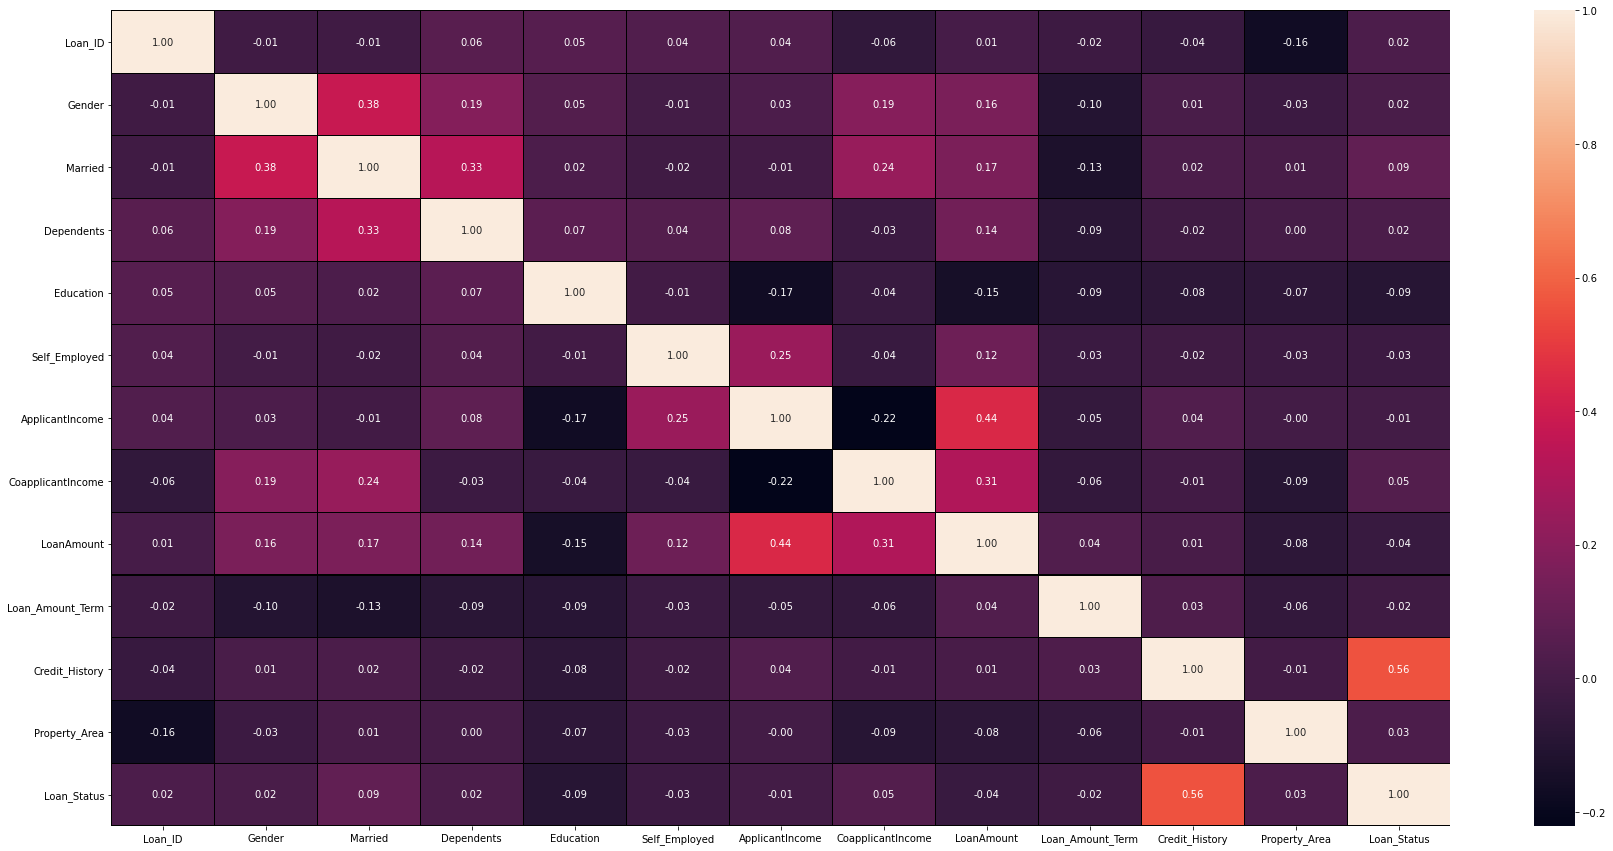

In [71]:
plt.figure(figsize=(30,15))
sns.heatmap(cor,annot=True,linewidths=0.1,linecolor="black",fmt="0.2f")

HEAT MAP CONVEYING THE CORRELATION OF COLUMNS HERE SOME COLUMNS SHOWING A NEGATIVE CORRELATION ISSUE ,WE WANT A FURTHER CHECK

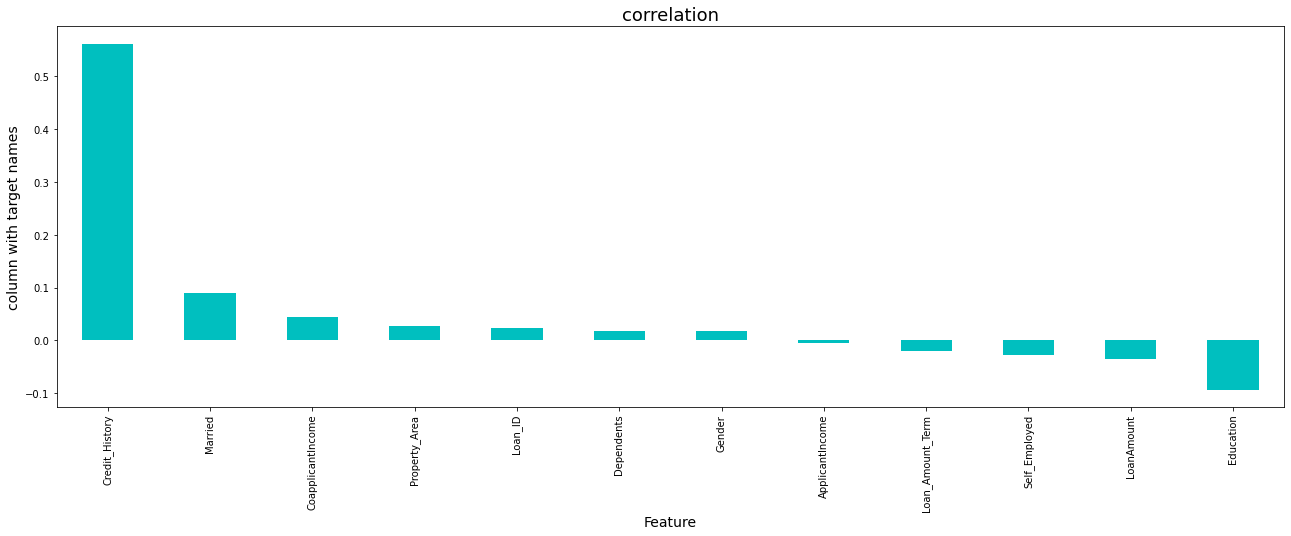

In [72]:
plt.figure(figsize=(22,7))
cor['Loan_Status'].sort_values(ascending=False).drop(['Loan_Status']).plot(kind='bar',color='c')
plt.xlabel('Feature',fontsize=14)
plt.ylabel('column with target names',fontsize=14)
plt.title('correlation',fontsize=18)
plt.show()

PLOT SHOWS EACH COLUMNS RELATION TO THE TARGET,
HERE CREDIT HISTORY PLAYING AN IMPORTANT ROLE IN LOAN STATUS COMPARING OTHER ATTRIBUTES

# SKEWNESS REMOVAL

In [73]:
new_df.skew()

Loan_ID              0.010879
Gender              -1.622920
Married             -0.630211
Dependents           1.052106
Education            1.306588
Self_Employed        2.252848
ApplicantIncome      2.148522
CoapplicantIncome    1.350517
LoanAmount           1.113132
Loan_Amount_Term    -2.098806
Credit_History      -1.976043
Property_Area       -0.055332
Loan_Status         -0.822635
dtype: float64

MOST OF THE COLUMNS HAVE SKEWNESS PRESENCE

HISTOGRAM PLOT DEFENETELY CONVEYS THE SKEWNESS PRESENCE

<AxesSubplot:ylabel='Frequency'>

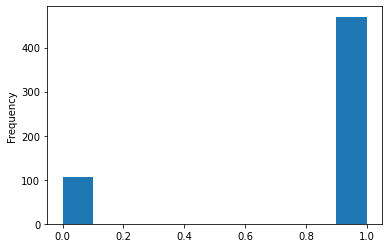

In [74]:
new_df['Gender'].plot.hist()

POSITIVE SKEWNESS IS THERE

<AxesSubplot:ylabel='Frequency'>

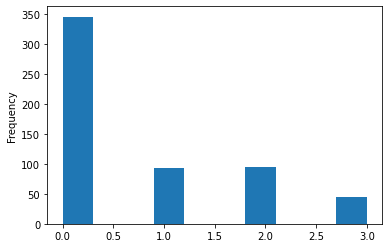

In [75]:
new_df['Dependents'].plot.hist()

CLEAR NEGATIVE SKEWNESS IS THERE

<AxesSubplot:ylabel='Frequency'>

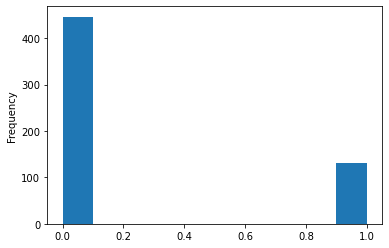

In [76]:
new_df['Education'].plot.hist()

NEGATIVE SKEWNESS IS PRESENT

<AxesSubplot:ylabel='Frequency'>

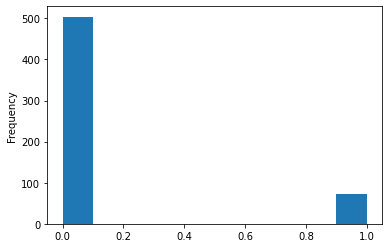

In [77]:
new_df['Self_Employed'].plot.hist()

HERE ALSO NEGATIVE SKEWNESS PRESENCE

<AxesSubplot:ylabel='Frequency'>

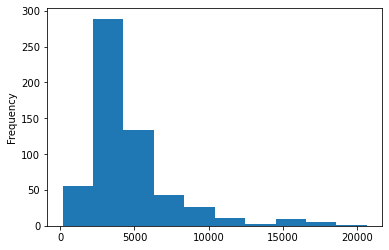

In [78]:
new_df['ApplicantIncome'].plot.hist()

In [79]:
NEGATIVE SKEWNESS THERE

SyntaxError: invalid syntax (<ipython-input-79-fe77e54ab269>, line 1)

<AxesSubplot:ylabel='Frequency'>

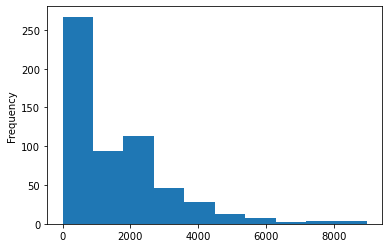

In [80]:
new_df['CoapplicantIncome'].plot.hist()

CLEARLY SKEWNESS PRESENT IN COAPPLICANT INCOME

<AxesSubplot:ylabel='Frequency'>

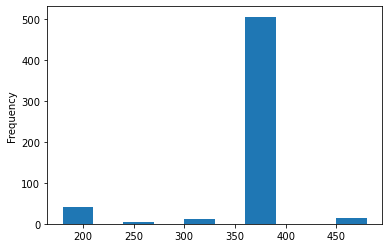

In [81]:
new_df['Loan_Amount_Term'].plot.hist()

IT HAS SKEWNESS PRESENCE

<AxesSubplot:ylabel='Frequency'>

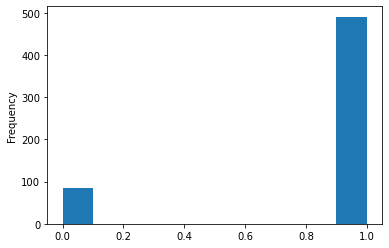

In [82]:
new_df['Credit_History'].plot.hist()

CLEAR SKEWNESS IS THERE

# SPLITTING X AND Y AND APPLYING POWER TRANSFORMER TO AVOID SKEWNESS

In [83]:
from sklearn.preprocessing import PowerTransformer

In [84]:
x=new_df.drop("Loan_Status",axis=1)
y=new_df["Loan_Status"]

In [85]:
x

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,0.0,1.0,0.0,0.0,0.0,0.0,5849,0.0,146.412162,360.0,1.0,2.0
1,1.0,1.0,1.0,1.0,0.0,0.0,4583,1508.0,128.000000,360.0,1.0,0.0
2,2.0,1.0,1.0,0.0,0.0,1.0,3000,0.0,66.000000,360.0,1.0,2.0
3,3.0,1.0,1.0,0.0,1.0,0.0,2583,2358.0,120.000000,360.0,1.0,2.0
4,4.0,1.0,0.0,0.0,0.0,0.0,6000,0.0,141.000000,360.0,1.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...
609,609.0,0.0,0.0,0.0,0.0,0.0,2900,0.0,71.000000,360.0,1.0,0.0
610,610.0,1.0,1.0,3.0,0.0,0.0,4106,0.0,40.000000,180.0,1.0,0.0
611,611.0,1.0,1.0,1.0,0.0,0.0,8072,240.0,253.000000,360.0,1.0,2.0
612,612.0,1.0,1.0,2.0,0.0,0.0,7583,0.0,187.000000,360.0,1.0,2.0


In [86]:
x.shape

(577, 12)

In [87]:
y

0      1.0
1      0.0
2      1.0
3      1.0
4      1.0
      ... 
609    1.0
610    1.0
611    1.0
612    1.0
613    0.0
Name: Loan_Status, Length: 577, dtype: float64

In [88]:
y.shape

(577,)

In [89]:
pt=PowerTransformer(method="yeo-johnson")

In [90]:
X_power=pt.fit_transform(x)

In [91]:
df1=pd.DataFrame(X_power,columns=x.columns)

In [92]:
df1.skew()

Loan_ID             -0.284298
Gender              -1.622920
Married             -0.630211
Dependents           0.478360
Education            1.306588
Self_Employed        2.252848
ApplicantIncome      0.027981
CoapplicantIncome   -0.191876
LoanAmount           0.047692
Loan_Amount_Term     0.727533
Credit_History      -1.976043
Property_Area       -0.155094
dtype: float64

some columns have still sqewness so removing it

In [93]:
from scipy import sqrt

In [94]:
df1["Gender"]=np.sqrt(df1["Gender"])

In [95]:
df1["Education"]=np.sqrt(df1["Education"])

In [96]:
df1["Self_Employed"]=np.sqrt(df1["Self_Employed"])

In [97]:
df1["Credit_History"]=np.sqrt(df1["Credit_History"])

In [98]:
df1.skew()

Loan_ID             -0.284298
Gender               0.000000
Married             -0.630211
Dependents           0.478360
Education            0.000000
Self_Employed        0.000000
ApplicantIncome      0.027981
CoapplicantIncome   -0.191876
LoanAmount           0.047692
Loan_Amount_Term     0.727533
Credit_History       0.000000
Property_Area       -0.155094
dtype: float64

skewness is removed successfully

<AxesSubplot:ylabel='Frequency'>

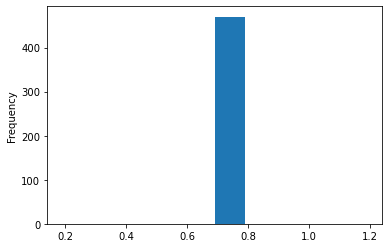

In [99]:
df1['Gender'].plot.hist()

skewness removed

<AxesSubplot:ylabel='Frequency'>

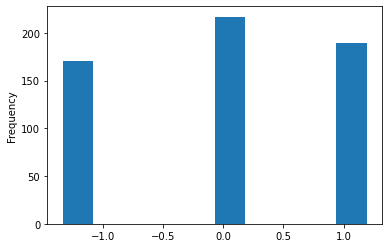

In [101]:
df1['Property_Area'].plot.hist()

skewness removed and no skewness presence

<AxesSubplot:ylabel='Frequency'>

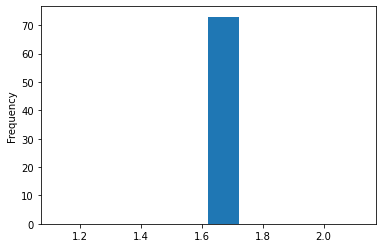

In [102]:
df1['Self_Employed'].plot.hist()

skewness removed

<AxesSubplot:ylabel='Frequency'>

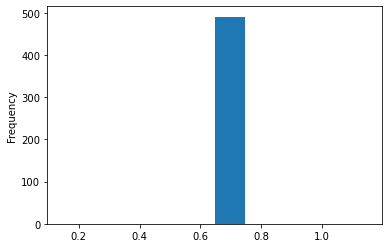

In [103]:
df1['Credit_History'].plot.hist()

in Credit_History also skewness removed

<AxesSubplot:ylabel='Frequency'>

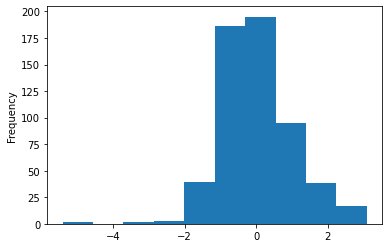

In [104]:
df1['ApplicantIncome'].plot.hist()

In [ ]:
skewness removed from applicant income

<AxesSubplot:ylabel='Frequency'>

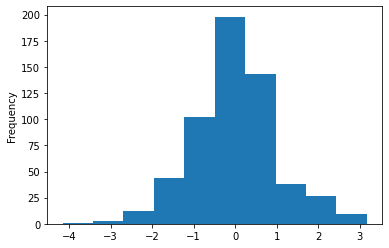

In [106]:
df1['LoanAmount'].plot.hist()

in loan amount also skewness removed

# SAMPLING TARGET

target columns are not balance each other the count is like Y= 422,,N =192

HERE PREFERING SMOTE OR OVERSAMPLING

In [107]:
from imblearn.over_sampling import SMOTE

In [108]:
sm=SMOTE()

In [109]:
x1,y1=sm.fit_resample(x,y)

In [111]:
y1

0      1.0
1      0.0
2      1.0
3      1.0
4      1.0
      ... 
791    0.0
792    0.0
793    0.0
794    0.0
795    0.0
Name: Loan_Status, Length: 796, dtype: float64

In [112]:
y1.value_counts()

0.0    398
1.0    398
Name: Loan_Status, dtype: int64

now the data balanced successfully and perfectly sampled

# MULTICOLLINEARITY

USING VIF FOR CHECKING MULTICOLLINEARITY

In [113]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [114]:
def vif_calc():
    vif=pd.DataFrame()
    vif['VIF Factor']=[variance_inflation_factor(x1.values,i)for i in range(x1.shape[1])]
    vif['Features']=x1.columns
    print(vif)

In [115]:
vif_calc()

    VIF Factor           Features
0     3.957437            Loan_ID
1     6.503731             Gender
2     3.835279            Married
3     1.866142         Dependents
4     1.420224          Education
5     1.238155      Self_Employed
6     5.877535    ApplicantIncome
7     2.627941  CoapplicantIncome
8    13.120352         LoanAmount
9    15.261540   Loan_Amount_Term
10    4.930756     Credit_History
11    2.624360      Property_Area


vif values are not in high range

# SCALING FEATURES

In [116]:
from sklearn.preprocessing import StandardScaler

In [117]:
sc=StandardScaler()

In [118]:
x1=sc.fit_transform(x1)

In [119]:
x1

array([[-1.76373112,  0.51205095, -1.38351665, ...,  0.23752723,
         0.56400778,  1.27568399],
       [-1.75785661,  0.51205095,  0.78192048, ...,  0.23752723,
         0.56400778, -1.318229  ],
       [-1.75198211,  0.51205095,  0.78192048, ...,  0.23752723,
         0.56400778,  1.27568399],
       ...,
       [-0.70228786,  0.51205095,  0.78192048, ...,  0.23752723,
         0.56400778, -0.6592324 ],
       [ 1.50440795,  0.51205095,  0.78192048, ..., -0.36926014,
        -2.01742586,  0.20294544],
       [ 1.18711315,  0.51205095, -1.38351665, ...,  0.23752723,
        -1.44718586, -1.318229  ]])

# SPLITTING AND APPLYING ALGORITHMS

we have x1 y1 that we already splitted for sampling

In [120]:
from sklearn.model_selection import train_test_split

In [121]:
x_train,x_test,y_train,y_test=train_test_split(x1,y1,test_size=.30,random_state=15)

In [122]:
x_train.shape

(557, 12)

In [123]:
x_test.shape

(239, 12)

In [124]:
y_train.shape

(557,)

In [125]:
y_test.shape

(239,)

# LOGISTIC REGRESSION

In [126]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report

In [127]:
lg=LogisticRegression()

In [128]:
lg.fit(x_train,y_train)

LogisticRegression()

In [129]:
pred=lg.predict(x_test)

In [130]:
print(pred)

[1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0. 1. 1. 0.
 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 0. 1. 1. 0. 1. 1. 1. 1. 1.
 0. 0. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 0. 0. 1. 1. 1. 1. 0. 1. 0. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 0. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 0. 1. 1.
 1. 1. 0. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1.
 1. 1. 0. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 0. 1. 0. 1. 1. 1. 1. 0. 1. 0.
 0. 0. 1. 0. 1. 1. 1. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1.
 0. 1. 1. 1. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 1. 1. 0. 0. 0.
 1. 0. 1. 1. 0. 0. 1. 0. 1. 1. 1. 0. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0.
 0. 1. 1. 0. 1. 1. 1. 1. 1. 0. 1. 1. 0. 0. 0. 1. 1. 0. 1. 0. 1. 0. 1.]


# ACCURACY SCORE,CONFUSION MATRIX,CLASSIFICATION REPORT

In [131]:
print("Accuracy score:",accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred)) 

Accuracy score: 0.7196652719665272
[[ 64  61]
 [  6 108]]
              precision    recall  f1-score   support

         0.0       0.91      0.51      0.66       125
         1.0       0.64      0.95      0.76       114

    accuracy                           0.72       239
   macro avg       0.78      0.73      0.71       239
weighted avg       0.78      0.72      0.71       239



# AUC-ROC CURVE

In [132]:
from sklearn.metrics import roc_curve

In [133]:
from sklearn.metrics import roc_auc_score

In [134]:
y_pred_prob=lg.predict_proba(x_test)[:,1]

In [135]:
y_pred_prob

array([0.56725915, 0.72839831, 0.47757435, 0.01185494, 0.50260634,
       0.81793408, 0.66670283, 0.60940088, 0.59144981, 0.8056677 ,
       0.03821275, 0.5072486 , 0.74788227, 0.57702006, 0.56199083,
       0.64162261, 0.74077637, 0.01192337, 0.78091516, 0.70126929,
       0.01259348, 0.59739487, 0.7717605 , 0.46176619, 0.59698633,
       0.62668568, 0.69789145, 0.01432047, 0.60623268, 0.70549622,
       0.50497053, 0.5192731 , 0.61614342, 0.72521842, 0.65138132,
       0.01595868, 0.69308657, 0.64121248, 0.69856228, 0.42949217,
       0.81352446, 0.6836735 , 0.01692687, 0.78542837, 0.59294408,
       0.77772364, 0.524742  , 0.67628065, 0.04694034, 0.02346281,
       0.71312133, 0.74196908, 0.69555565, 0.80933791, 0.71669317,
       0.68137369, 0.68661272, 0.08603785, 0.02145613, 0.70388035,
       0.05237052, 0.02295701, 0.75142651, 0.80043754, 0.79964661,
       0.67204804, 0.02085642, 0.61582561, 0.41120795, 0.80398575,
       0.74310715, 0.78338414, 0.51466931, 0.71635015, 0.69027

In [136]:
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)

In [137]:
fpr

array([0.   , 0.   , 0.   , 0.008, 0.008, 0.016, 0.016, 0.032, 0.032,
       0.056, 0.056, 0.064, 0.064, 0.072, 0.072, 0.088, 0.088, 0.096,
       0.096, 0.112, 0.112, 0.12 , 0.12 , 0.144, 0.144, 0.152, 0.152,
       0.16 , 0.16 , 0.168, 0.168, 0.176, 0.176, 0.192, 0.192, 0.224,
       0.224, 0.24 , 0.24 , 0.272, 0.272, 0.288, 0.288, 0.296, 0.296,
       0.304, 0.304, 0.312, 0.312, 0.352, 0.352, 0.36 , 0.36 , 0.392,
       0.392, 0.424, 0.424, 0.448, 0.448, 0.456, 0.456, 0.472, 0.472,
       0.512, 0.512, 0.536, 0.536, 0.712, 0.712, 1.   ])

In [138]:
tpr

array([0.        , 0.00877193, 0.04385965, 0.04385965, 0.07017544,
       0.07017544, 0.07894737, 0.07894737, 0.11403509, 0.11403509,
       0.14912281, 0.14912281, 0.20175439, 0.20175439, 0.25438596,
       0.25438596, 0.26315789, 0.26315789, 0.27192982, 0.27192982,
       0.37719298, 0.37719298, 0.4122807 , 0.4122807 , 0.45614035,
       0.45614035, 0.47368421, 0.47368421, 0.54385965, 0.54385965,
       0.61403509, 0.61403509, 0.64912281, 0.64912281, 0.66666667,
       0.66666667, 0.70175439, 0.70175439, 0.74561404, 0.74561404,
       0.75438596, 0.75438596, 0.76315789, 0.76315789, 0.77192982,
       0.77192982, 0.78070175, 0.78070175, 0.78947368, 0.78947368,
       0.85087719, 0.85087719, 0.88596491, 0.88596491, 0.89473684,
       0.89473684, 0.90350877, 0.90350877, 0.92105263, 0.92105263,
       0.92982456, 0.92982456, 0.94736842, 0.94736842, 0.98245614,
       0.98245614, 0.99122807, 0.99122807, 1.        , 1.        ])

In [139]:
thresholds

array([1.85478596, 0.85478596, 0.82656933, 0.82407056, 0.81380542,
       0.81373239, 0.81352446, 0.80815037, 0.80316366, 0.79816847,
       0.7856261 , 0.78542837, 0.77766181, 0.77718556, 0.76502322,
       0.76178543, 0.76068992, 0.75750262, 0.75439827, 0.75142651,
       0.73399065, 0.73302552, 0.72521842, 0.71669317, 0.71059365,
       0.70831613, 0.70549622, 0.70447295, 0.69555565, 0.69308657,
       0.68137369, 0.68120995, 0.67602192, 0.67298104, 0.67132786,
       0.66633636, 0.6540651 , 0.64737335, 0.63185987, 0.62356252,
       0.62295574, 0.62210461, 0.6210135 , 0.62065725, 0.6190592 ,
       0.61614342, 0.61582561, 0.61473227, 0.61408082, 0.60208088,
       0.59144981, 0.59012591, 0.58029227, 0.56352749, 0.56199083,
       0.54327583, 0.53621065, 0.52507623, 0.5246547 , 0.52271146,
       0.5192731 , 0.5105616 , 0.50674004, 0.47132001, 0.42949217,
       0.40786392, 0.40687853, 0.03173236, 0.03129759, 0.00708336])

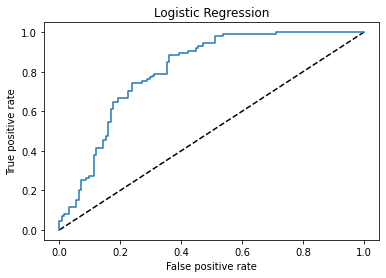

In [140]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label="Logistic Regression")
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
plt.title("Logistic Regression")
plt.show()

# DECISION TREE CLASSSIFIER

In [141]:
from sklearn.tree import DecisionTreeClassifier

In [142]:
dtc=DecisionTreeClassifier()

In [143]:
dtc.fit(x_train,y_train)

DecisionTreeClassifier()

In [144]:
dtc.score(x_train,y_train)

1.0

In [145]:
preddtc=dtc.predict(x_test)

In [146]:
print(preddtc)

[0. 1. 0. 0. 1. 1. 0. 0. 0. 1. 0. 1. 1. 0. 1. 1. 1. 1. 1. 0. 0. 0. 1. 0.
 0. 1. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 1. 1. 0. 1. 0. 0. 1. 1. 1. 1.
 0. 0. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 1. 1. 1. 1. 1.
 0. 1. 0. 1. 0. 1. 0. 0. 0. 1. 0. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 0. 0. 0.
 1. 1. 0. 1. 0. 0. 1. 0. 1. 1. 1. 0. 1. 1. 1. 0. 0. 1. 0. 0. 1. 0. 1. 0.
 1. 0. 0. 1. 0. 0. 0. 1. 0. 1. 1. 1. 1. 0. 0. 1. 0. 1. 1. 1. 1. 0. 0. 1.
 0. 0. 1. 0. 1. 1. 1. 0. 0. 0. 1. 1. 1. 1. 0. 0. 1. 0. 0. 0. 0. 1. 1. 0.
 0. 0. 1. 1. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 1. 1. 0. 0. 0.
 1. 0. 1. 1. 0. 0. 0. 0. 1. 0. 1. 0. 1. 0. 0. 1. 1. 0. 1. 1. 1. 0. 1. 0.
 0. 1. 0. 0. 1. 1. 1. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 1.]


# accuracy score ,confusion matrix,classification report

In [147]:
accdtc=classification_report(y_test,preddtc)

In [148]:
print(accdtc)

              precision    recall  f1-score   support

         0.0       0.81      0.80      0.81       125
         1.0       0.78      0.80      0.79       114

    accuracy                           0.80       239
   macro avg       0.80      0.80      0.80       239
weighted avg       0.80      0.80      0.80       239



In [149]:
print(confusion_matrix(y_test,preddtc))
print(classification_report(y_test,preddtc)) 

[[100  25]
 [ 23  91]]
              precision    recall  f1-score   support

         0.0       0.81      0.80      0.81       125
         1.0       0.78      0.80      0.79       114

    accuracy                           0.80       239
   macro avg       0.80      0.80      0.80       239
weighted avg       0.80      0.80      0.80       239



# AUC ROC CURVE

In [150]:
y_pred_prob=dtc.predict_proba(x_test)[:,1]

In [151]:
y_pred_prob

array([0., 1., 0., 0., 1., 1., 0., 0., 0., 1., 0., 1., 1., 0., 1., 1., 1.,
       1., 1., 0., 0., 0., 1., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 1., 1., 1., 0., 1., 0., 0., 1., 1., 1., 1., 0., 0., 1.,
       1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 1.,
       1., 1., 1., 1., 0., 1., 0., 1., 0., 1., 0., 0., 0., 1., 0., 1., 1.,
       1., 1., 1., 1., 0., 1., 1., 1., 0., 0., 0., 1., 1., 0., 1., 0., 0.,
       1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 0., 1., 0., 0., 1., 0., 1.,
       0., 1., 0., 0., 1., 0., 0., 0., 1., 0., 1., 1., 1., 1., 0., 0., 1.,
       0., 1., 1., 1., 1., 0., 0., 1., 0., 0., 1., 0., 1., 1., 1., 0., 0.,
       0., 1., 1., 1., 1., 0., 0., 1., 0., 0., 0., 0., 1., 1., 0., 0., 0.,
       1., 1., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 1., 1.,
       1., 1., 0., 0., 0., 1., 0., 1., 1., 0., 0., 0., 0., 1., 0., 1., 0.,
       1., 0., 0., 1., 1., 0., 1., 1., 1., 0., 1., 0., 0., 1., 0., 0., 1.,
       1., 1., 0., 0., 0.

In [152]:
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)

In [153]:
fpr

array([0. , 0.2, 1. ])

In [154]:
tpr

array([0.        , 0.79824561, 1.        ])

In [155]:
thresholds

array([2., 1., 0.])

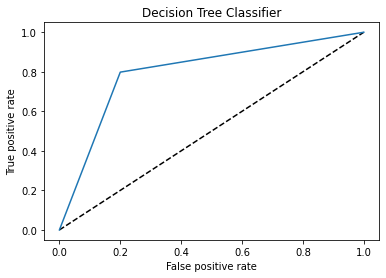

In [156]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label="Decision Tree Classifier")
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
plt.title("Decision Tree Classifier")
plt.show()

# K-NEAREST NEIGHBOR

In [157]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()

In [158]:
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [159]:
predknn=knn.predict(x_test)

In [160]:
print(predknn)

[0. 1. 1. 0. 0. 1. 1. 1. 1. 1. 0. 0. 1. 0. 1. 0. 1. 0. 1. 1. 0. 0. 1. 1.
 1. 1. 1. 0. 0. 1. 1. 0. 0. 1. 1. 0. 0. 1. 1. 1. 0. 1. 0. 0. 0. 1. 1. 1.
 0. 0. 1. 1. 1. 1. 1. 0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 1. 0. 1. 0. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 0. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1.
 1. 0. 0. 1. 0. 0. 1. 1. 0. 0. 1. 0. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 0. 0.
 0. 1. 0. 1. 0. 1. 1. 1. 0. 1. 1. 1. 1. 0. 0. 1. 0. 0. 1. 1. 1. 0. 1. 1.
 0. 0. 1. 0. 1. 1. 0. 0. 0. 0. 1. 1. 1. 0. 1. 1. 1. 0. 0. 1. 0. 1. 1. 0.
 0. 1. 1. 1. 1. 0. 1. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 1. 1. 0. 0. 0.
 1. 0. 1. 1. 0. 0. 1. 0. 1. 1. 1. 1. 1. 1. 0. 1. 0. 1. 1. 1. 0. 1. 1. 0.
 0. 0. 1. 1. 1. 1. 1. 1. 0. 1. 0. 1. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 1.]


# accuracy score ,confusion matrix,classification report

In [161]:
accknn=classification_report(y_test,predknn)

In [162]:
print(accknn)

              precision    recall  f1-score   support

         0.0       0.83      0.66      0.74       125
         1.0       0.70      0.85      0.77       114

    accuracy                           0.75       239
   macro avg       0.76      0.76      0.75       239
weighted avg       0.77      0.75      0.75       239



In [163]:
print(confusion_matrix(y_test,predknn))
print(classification_report(y_test,predknn))

[[83 42]
 [17 97]]
              precision    recall  f1-score   support

         0.0       0.83      0.66      0.74       125
         1.0       0.70      0.85      0.77       114

    accuracy                           0.75       239
   macro avg       0.76      0.76      0.75       239
weighted avg       0.77      0.75      0.75       239



# AUC ROC CURVE

In [164]:
y_pred_prob=knn.predict_proba(x_test)[:,1]

In [165]:
y_pred_prob

array([0.2, 0.6, 0.6, 0. , 0.4, 1. , 0.6, 0.6, 0.6, 0.8, 0. , 0.4, 1. ,
       0.4, 0.6, 0.2, 1. , 0. , 0.6, 0.6, 0. , 0.4, 0.6, 0.8, 0.6, 0.6,
       0.8, 0. , 0.2, 0.8, 0.6, 0.4, 0. , 1. , 0.6, 0. , 0.2, 0.8, 1. ,
       0.6, 0.4, 0.6, 0.2, 0.4, 0.4, 0.8, 1. , 1. , 0.4, 0. , 0.8, 1. ,
       0.6, 1. , 0.8, 0.4, 0.6, 0. , 0. , 1. , 0. , 0. , 0.4, 1. , 0.2,
       1. , 0. , 1. , 0.4, 1. , 1. , 1. , 1. , 1. , 0.6, 0.8, 1. , 0.6,
       0.2, 0.6, 0. , 1. , 0. , 0.8, 0.8, 0.6, 0.6, 1. , 0.8, 0.6, 0.8,
       1. , 0.6, 0.2, 0.6, 0.6, 1. , 0. , 0. , 0.8, 0.2, 0. , 1. , 0.8,
       0.4, 0.4, 1. , 0.2, 0.8, 0.6, 0.8, 0.8, 1. , 0.6, 0. , 0.2, 1. ,
       0.6, 0.4, 0.4, 0.4, 1. , 0. , 0.6, 0.2, 0.8, 0.8, 0.8, 0.2, 1. ,
       0.8, 0.8, 0.8, 0.4, 0.2, 0.8, 0.2, 0.4, 0.6, 0.8, 1. , 0.2, 0.8,
       1. , 0.2, 0. , 0.8, 0.2, 1. , 0.6, 0.4, 0. , 0.2, 0. , 1. , 1. ,
       1. , 0.4, 0.8, 0.6, 1. , 0. , 0.4, 0.6, 0.4, 1. , 1. , 0.4, 0. ,
       0.8, 0.6, 0.8, 0.6, 0.2, 0.6, 0.2, 1. , 0. , 0.2, 0. , 0.

In [166]:
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)

In [167]:
fpr

array([0.   , 0.064, 0.192, 0.336, 0.472, 0.688, 1.   ])

In [168]:
tpr

array([0.        , 0.37719298, 0.61403509, 0.85087719, 0.96491228,
       1.        , 1.        ])

In [169]:
thresholds

array([2. , 1. , 0.8, 0.6, 0.4, 0.2, 0. ])

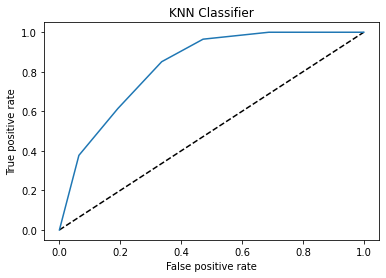

In [170]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label="KNN Classifier")
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
plt.title("KNN Classifier")
plt.show()

# SUPPORT VECTOR

In [171]:
from sklearn.svm import SVC

In [172]:
svc=SVC(probability=True)

In [173]:
svc.fit(x_train,y_train)

SVC(probability=True)

In [174]:
predsvc=svc.predict(x_test)

In [175]:
print(predsvc)

[0. 1. 0. 0. 1. 1. 1. 0. 1. 1. 0. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0. 1. 1. 1.
 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1.
 0. 0. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 0. 0. 1. 1. 0. 1. 0. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 0. 0. 0. 0. 1. 0. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 0. 1. 0.
 1. 0. 0. 1. 0. 0. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1.
 1. 1. 0. 1. 0. 1. 1. 1. 0. 1. 1. 1. 1. 0. 0. 1. 0. 1. 0. 1. 1. 0. 1. 1.
 0. 0. 1. 0. 1. 1. 1. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 0. 1. 1. 1.
 0. 0. 1. 1. 1. 1. 0. 0. 1. 0. 1. 0. 0. 0. 1. 0. 0. 1. 1. 1. 1. 0. 0. 0.
 1. 0. 1. 1. 0. 0. 1. 0. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0.
 0. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 1.]


# accuracy score ,confusion matrix,classification report

In [176]:
accsvc=classification_report(y_test,predsvc)

In [177]:
print(accsvc)

              precision    recall  f1-score   support

         0.0       0.94      0.60      0.73       125
         1.0       0.69      0.96      0.80       114

    accuracy                           0.77       239
   macro avg       0.81      0.78      0.77       239
weighted avg       0.82      0.77      0.76       239



In [178]:
print(confusion_matrix(y_test,predsvc))
print(classification_report(y_test,predsvc))

[[ 75  50]
 [  5 109]]
              precision    recall  f1-score   support

         0.0       0.94      0.60      0.73       125
         1.0       0.69      0.96      0.80       114

    accuracy                           0.77       239
   macro avg       0.81      0.78      0.77       239
weighted avg       0.82      0.77      0.76       239



# AUC ROC CURVE

In [179]:
y_pred_prob=svc.predict_proba(x_test)[:,1]

In [180]:
 y_pred_prob

array([0.22925774, 0.67246287, 0.28197247, 0.04702939, 0.58294298,
       0.88606851, 0.42514864, 0.34976936, 0.56421472, 0.81905257,
       0.21535856, 0.56641809, 0.83287444, 0.51135413, 0.79090496,
       0.45960907, 0.78688241, 0.00575667, 0.84121333, 0.79961278,
       0.00757067, 0.40404782, 0.79468883, 0.43621103, 0.48734716,
       0.7859389 , 0.80004032, 0.06068012, 0.277017  , 0.79806948,
       0.44190426, 0.43938094, 0.46401636, 0.81780279, 0.75426529,
       0.03557289, 0.37103726, 0.83000706, 0.83658412, 0.53267182,
       0.64942727, 0.70568696, 0.06140763, 0.65269648, 0.53068768,
       0.83827656, 0.77726067, 0.82261364, 0.22027676, 0.04837216,
       0.82876884, 0.81509925, 0.73768142, 0.84416167, 0.75280776,
       0.62696557, 0.51331646, 0.01211406, 0.01018859, 0.79605355,
       0.0897161 , 0.03616543, 0.81432565, 0.86351679, 0.25127963,
       0.8168614 , 0.05674592, 0.74712101, 0.38739182, 0.8844543 ,
       0.8387607 , 0.89471553, 0.61872904, 0.85390806, 0.88469

In [181]:
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)

In [182]:
fpr

array([0.   , 0.   , 0.008, 0.008, 0.016, 0.016, 0.024, 0.024, 0.032,
       0.032, 0.04 , 0.04 , 0.048, 0.048, 0.056, 0.056, 0.064, 0.064,
       0.072, 0.072, 0.088, 0.088, 0.096, 0.096, 0.104, 0.104, 0.112,
       0.112, 0.12 , 0.12 , 0.136, 0.136, 0.144, 0.144, 0.152, 0.152,
       0.168, 0.168, 0.176, 0.176, 0.184, 0.184, 0.192, 0.192, 0.216,
       0.216, 0.224, 0.224, 0.248, 0.248, 0.256, 0.256, 0.264, 0.264,
       0.28 , 0.28 , 0.296, 0.296, 0.312, 0.312, 0.32 , 0.32 , 0.336,
       0.336, 0.352, 0.352, 0.36 , 0.36 , 0.368, 0.368, 0.4  , 0.4  ,
       0.416, 0.416, 0.44 , 0.44 , 0.536, 0.536, 0.6  , 0.6  , 1.   ])

In [183]:
tpr

array([0.        , 0.00877193, 0.00877193, 0.06140351, 0.06140351,
       0.07017544, 0.07017544, 0.07894737, 0.07894737, 0.09649123,
       0.09649123, 0.14912281, 0.14912281, 0.15789474, 0.15789474,
       0.23684211, 0.23684211, 0.34210526, 0.34210526, 0.44736842,
       0.44736842, 0.5       , 0.5       , 0.51754386, 0.51754386,
       0.53508772, 0.53508772, 0.57017544, 0.57017544, 0.57894737,
       0.57894737, 0.5877193 , 0.5877193 , 0.59649123, 0.59649123,
       0.64912281, 0.64912281, 0.65789474, 0.65789474, 0.6754386 ,
       0.6754386 , 0.70175439, 0.70175439, 0.72807018, 0.72807018,
       0.81578947, 0.81578947, 0.8245614 , 0.8245614 , 0.83333333,
       0.83333333, 0.84210526, 0.84210526, 0.85087719, 0.85087719,
       0.87719298, 0.87719298, 0.89473684, 0.89473684, 0.90350877,
       0.90350877, 0.9122807 , 0.9122807 , 0.92105263, 0.92105263,
       0.92982456, 0.92982456, 0.94736842, 0.94736842, 0.95614035,
       0.95614035, 0.96491228, 0.96491228, 0.97368421, 0.97368

In [184]:
thresholds

array([1.92305133, 0.92305133, 0.89972374, 0.8844543 , 0.87058047,
       0.8682179 , 0.86351679, 0.85970893, 0.85961722, 0.85819165,
       0.85737316, 0.8470547 , 0.84416167, 0.8429982 , 0.84269646,
       0.83658412, 0.83587224, 0.82261364, 0.82196067, 0.81452903,
       0.81295223, 0.79961278, 0.7994954 , 0.79605355, 0.79488796,
       0.79453552, 0.79415083, 0.78688241, 0.7859389 , 0.78447654,
       0.78218526, 0.78212569, 0.78150199, 0.78135715, 0.77795734,
       0.75685264, 0.75398173, 0.75341806, 0.75280776, 0.74712101,
       0.74296085, 0.73709385, 0.73329894, 0.72572252, 0.7163143 ,
       0.66548798, 0.65269648, 0.64942727, 0.64304696, 0.63722577,
       0.63163697, 0.62696557, 0.61872904, 0.59281169, 0.58294298,
       0.56421472, 0.54325094, 0.53068768, 0.52450558, 0.52220486,
       0.52007459, 0.51331646, 0.5       , 0.48734716, 0.46401636,
       0.45960907, 0.44190426, 0.43621103, 0.42514864, 0.40404782,
       0.38739182, 0.38448635, 0.37103726, 0.36869568, 0.34976

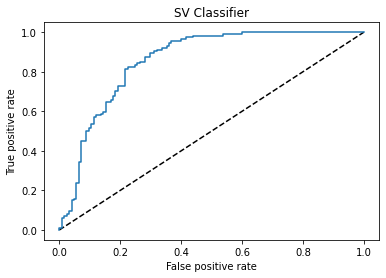

In [185]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label="Support Vector Classifier")
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
plt.title("SV Classifier")
plt.show()

# RANDOMFOREST

In [186]:
from sklearn.ensemble import RandomForestClassifier

In [187]:
rfc=RandomForestClassifier()

In [188]:
rfc.fit(x_train,y_train)

RandomForestClassifier()

In [189]:
predrfc=rfc.predict(x_test)

In [190]:
print(predrfc)

[0. 1. 0. 0. 1. 1. 0. 0. 0. 1. 0. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0. 1. 1. 1.
 1. 0. 1. 0. 0. 1. 0. 1. 0. 1. 0. 0. 0. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1.
 0. 0. 1. 1. 1. 1. 1. 1. 0. 0. 0. 1. 0. 0. 1. 0. 1. 1. 0. 1. 1. 1. 1. 1.
 0. 1. 1. 1. 1. 1. 0. 0. 0. 1. 0. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 0. 0. 0.
 1. 0. 0. 1. 0. 0. 1. 0. 1. 1. 1. 0. 1. 1. 1. 0. 1. 0. 0. 1. 1. 1. 1. 0.
 1. 1. 0. 1. 0. 0. 1. 1. 0. 1. 1. 1. 1. 0. 0. 1. 0. 1. 0. 1. 1. 0. 1. 0.
 0. 0. 1. 0. 1. 1. 1. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 0.
 0. 0. 1. 1. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 1. 1. 0. 0. 0.
 1. 0. 1. 1. 0. 0. 0. 0. 1. 1. 1. 0. 1. 1. 0. 1. 1. 0. 1. 1. 1. 0. 1. 0.
 0. 1. 0. 0. 1. 1. 1. 1. 0. 1. 1. 1. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 1.]


# accuracy score ,confusion matrix,classification report

In [191]:
accrfc=classification_report(y_test,predrfc)

In [192]:
print(accrfc)

              precision    recall  f1-score   support

         0.0       0.93      0.76      0.84       125
         1.0       0.78      0.94      0.85       114

    accuracy                           0.85       239
   macro avg       0.86      0.85      0.84       239
weighted avg       0.86      0.85      0.84       239



In [193]:
print(confusion_matrix(y_test,predrfc))
print(classification_report(y_test,predrfc))

[[ 95  30]
 [  7 107]]
              precision    recall  f1-score   support

         0.0       0.93      0.76      0.84       125
         1.0       0.78      0.94      0.85       114

    accuracy                           0.85       239
   macro avg       0.86      0.85      0.84       239
weighted avg       0.86      0.85      0.84       239



# AUC ROC CURVE

In [194]:
y_pred_prob=rfc.predict_proba(x_test)[:,1]

In [195]:
y_pred_prob

array([0.15, 0.82, 0.23, 0.05, 0.77, 0.89, 0.24, 0.31, 0.48, 0.74, 0.14,
       0.53, 0.88, 0.74, 0.87, 0.62, 0.8 , 0.01, 0.76, 0.72, 0.01, 0.6 ,
       0.72, 0.51, 0.74, 0.47, 0.71, 0.03, 0.47, 0.75, 0.04, 0.67, 0.16,
       0.79, 0.15, 0.08, 0.21, 0.88, 0.99, 0.65, 0.56, 0.91, 0.1 , 0.39,
       0.7 , 0.86, 0.78, 0.91, 0.05, 0.01, 0.89, 0.92, 0.83, 0.9 , 0.66,
       0.69, 0.5 , 0.02, 0.04, 0.84, 0.03, 0.03, 0.61, 0.39, 0.64, 0.81,
       0.18, 0.8 , 0.7 , 0.84, 0.82, 0.89, 0.11, 0.93, 0.77, 0.82, 0.83,
       0.79, 0.02, 0.02, 0.21, 0.92, 0.05, 0.83, 0.86, 0.57, 0.83, 0.79,
       0.68, 0.06, 0.79, 0.81, 0.69, 0.12, 0.23, 0.35, 0.86, 0.38, 0.08,
       0.78, 0.2 , 0.04, 0.91, 0.28, 0.66, 0.74, 0.87, 0.39, 0.78, 0.77,
       0.9 , 0.43, 0.81, 0.48, 0.03, 0.64, 0.77, 0.52, 0.58, 0.26, 0.7 ,
       0.83, 0.11, 0.82, 0.18, 0.24, 0.56, 0.89, 0.01, 0.85, 0.86, 0.79,
       0.87, 0.03, 0.03, 0.69, 0.14, 0.55, 0.43, 0.94, 0.86, 0.03, 0.65,
       0.5 , 0.16, 0.07, 0.92, 0.05, 0.98, 0.85, 0.

In [196]:
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)

In [197]:
fpr

array([0.   , 0.   , 0.008, 0.008, 0.008, 0.008, 0.016, 0.032, 0.032,
       0.032, 0.032, 0.032, 0.032, 0.032, 0.04 , 0.056, 0.056, 0.064,
       0.072, 0.08 , 0.104, 0.104, 0.104, 0.12 , 0.12 , 0.12 , 0.12 ,
       0.144, 0.152, 0.152, 0.152, 0.168, 0.176, 0.192, 0.192, 0.208,
       0.208, 0.216, 0.216, 0.224, 0.232, 0.232, 0.24 , 0.24 , 0.24 ,
       0.272, 0.288, 0.312, 0.336, 0.336, 0.36 , 0.384, 0.416, 0.424,
       0.44 , 0.464, 0.472, 0.488, 0.528, 0.56 , 0.608, 0.616, 0.64 ,
       0.672, 0.688, 0.728, 0.872, 1.   ])

In [198]:
tpr

array([0.        , 0.01754386, 0.02631579, 0.03508772, 0.07017544,
       0.11403509, 0.15789474, 0.15789474, 0.19298246, 0.21052632,
       0.25438596, 0.31578947, 0.35964912, 0.39473684, 0.44736842,
       0.48245614, 0.50877193, 0.53508772, 0.57017544, 0.61403509,
       0.63157895, 0.66666667, 0.68421053, 0.70175439, 0.71052632,
       0.74561404, 0.76315789, 0.77192982, 0.80701754, 0.8245614 ,
       0.85087719, 0.85964912, 0.86842105, 0.86842105, 0.88596491,
       0.88596491, 0.89473684, 0.89473684, 0.9122807 , 0.92105263,
       0.92105263, 0.92982456, 0.92982456, 0.93859649, 0.97368421,
       0.97368421, 0.97368421, 0.98245614, 0.98245614, 0.99122807,
       0.99122807, 0.99122807, 0.99122807, 0.99122807, 0.99122807,
       0.99122807, 0.99122807, 0.99122807, 0.99122807, 0.99122807,
       0.99122807, 0.99122807, 0.99122807, 0.99122807, 0.99122807,
       1.        , 1.        , 1.        ])

In [199]:
thresholds

array([1.99, 0.99, 0.98, 0.96, 0.93, 0.92, 0.91, 0.9 , 0.89, 0.88, 0.87,
       0.86, 0.85, 0.84, 0.83, 0.82, 0.81, 0.8 , 0.79, 0.78, 0.77, 0.76,
       0.75, 0.74, 0.73, 0.72, 0.71, 0.7 , 0.69, 0.68, 0.67, 0.66, 0.65,
       0.64, 0.62, 0.61, 0.6 , 0.59, 0.57, 0.56, 0.55, 0.53, 0.52, 0.51,
       0.48, 0.43, 0.4 , 0.39, 0.31, 0.3 , 0.25, 0.24, 0.21, 0.2 , 0.19,
       0.18, 0.17, 0.16, 0.15, 0.14, 0.1 , 0.09, 0.08, 0.07, 0.06, 0.05,
       0.03, 0.01])

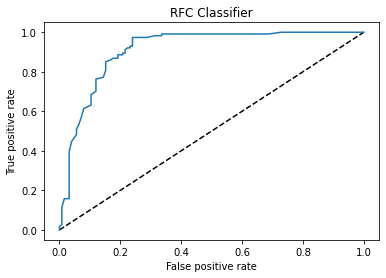

In [200]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label="Random Forest Classifier")
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
plt.title("RFC Classifier")
plt.show()

we got different accuracy scores here,logistic regression:logistic regressor:72%,,dtc:80%,,knn:75%,,svc:77%,,rfc:85%

# CROSS VALIDATION MEAN SCORE

In [201]:
from sklearn.model_selection import cross_val_score

In [202]:
print(cross_val_score(lg,x1,y1,cv=5).mean())

0.6809827044025157


In [203]:
print(cross_val_score(dtc,x1,y1,cv=5).mean())

0.4863286163522013


In [204]:
print(cross_val_score(knn,x1,y1,cv=5).mean())

0.7173506289308176


In [205]:
print(cross_val_score(svc,x1,y1,cv=5).mean())

0.7412342767295598


In [206]:
print(cross_val_score(rfc,x1,y1,cv=5).mean())

0.5592924528301887


# HERE PREFERING KNN FOR FURTHER PROCEEDINGS:HYPERPARAMETER TUNING

In [207]:
from sklearn.model_selection import GridSearchCV

In [211]:
parameter={'n_neighbors':np.arange(2,10),'weights':['uniform','distance'],

           'algorithm':['auto','ball_tree','kd_tree','brute'],'leaf_size':[10,20,30,40]}

In [212]:
GSV=GridSearchCV(KNeighborsClassifier(),parameter,cv=5)

In [213]:
GSV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'leaf_size': [10, 20, 30, 40],
                         'n_neighbors': array([2, 3, 4, 5, 6, 7, 8, 9]),
                         'weights': ['uniform', 'distance']})

In [214]:
GSV.best_params_

{'algorithm': 'auto', 'leaf_size': 10, 'n_neighbors': 2, 'weights': 'distance'}

PASSING BEST PARAMETER TO OUR MODEL

In [215]:
Finalloan_model=KNeighborsClassifier(algorithm='auto',leaf_size=10,
 n_neighbors=2,
 weights='distance')

In [216]:
Finalloan_model.fit(x_train,y_train)

KNeighborsClassifier(leaf_size=10, n_neighbors=2, weights='distance')

In [217]:
Finalpred=Finalloan_model.predict(x_test)

In [218]:
print(Finalpred)

[0. 1. 0. 0. 0. 1. 0. 1. 1. 1. 0. 0. 1. 0. 1. 0. 1. 0. 1. 1. 0. 1. 1. 1.
 1. 0. 1. 0. 0. 1. 0. 1. 0. 1. 0. 0. 0. 1. 1. 1. 1. 1. 0. 0. 0. 1. 1. 1.
 0. 0. 1. 1. 1. 1. 0. 1. 0. 0. 0. 1. 0. 0. 1. 1. 0. 1. 0. 1. 0. 1. 1. 1.
 1. 1. 1. 1. 1. 0. 0. 0. 0. 1. 0. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 0. 0. 0.
 1. 0. 0. 0. 0. 0. 1. 0. 1. 0. 1. 0. 0. 0. 0. 1. 1. 1. 0. 0. 1. 0. 1. 0.
 1. 1. 0. 0. 0. 0. 0. 1. 0. 1. 1. 0. 1. 0. 0. 1. 0. 0. 0. 1. 1. 0. 0. 1.
 0. 0. 1. 0. 1. 1. 1. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 1. 1. 1. 1.
 0. 0. 0. 1. 1. 0. 1. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 1. 1. 0. 0. 0.
 1. 0. 1. 1. 0. 0. 0. 0. 1. 1. 1. 0. 1. 1. 0. 1. 1. 0. 1. 1. 1. 0. 1. 0.
 1. 1. 0. 0. 1. 1. 1. 1. 1. 0. 1. 1. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 1.]


In [219]:
Finalacc=accuracy_score(y_test,Finalpred)

In [220]:
print(Finalacc)

0.8493723849372385


model getting 85% of accuracy

# conclusion and saving

In [221]:
conclusion=pd.DataFrame([Finalloan_model.predict(x_test)[:],Finalpred[:]],index=["Predicted","Orginal"])

In [222]:
conclusion

,0,1,2,3,4,5,6,7,8,9,...,229,230,231,232,233,234,235,236,237,238
Predicted,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
Orginal,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


SAVING

In [223]:
import joblib

In [224]:
joblib.dump(Finalloan_model,"loan_model.pk1")

['loan_model.pk1']